# Presenting PISA results
## 0. Warming up 
### a) Reading the data 
- From Excel file riket2023_åk9_np.xlsx"
- for different sheets representing the sujects

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
def read_data(mysheetname):
    df_tmp=pd.read_excel("./Data/riket2023_åk9_np.xlsx", sheet_name=mysheetname, skiprows=8)
    df_tmp.columns=['Plats', 'Huvudman','Totalt (A-F)','Flickor (A-F)','Pojkar (A-F)','Totalt (A-E)','Flickor (A-E)','Pojkar (A-E)','Totalt (poäng)','Flickor (poäng)','Pojkar (poäng)']
    
    # list the numeric columns to be cleaned
    numeric_columns = ['Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
    # Cleaning the data, i.e. removing (replacing) the '~' with ''ArithmeticError 
    df_tmp[numeric_columns] = df_tmp[numeric_columns].replace('[^0-9.]', '', regex=True)
    #df_tmp[numeric_columns] = df_tmp[numeric_columns].astype(float)
   
    return df_tmp


df_engelska=read_data("Engelska")
df_matematik=read_data("Matematik")
df_svenska=read_data("Svenska")
df_sv_andra_sp=read_data("Svenska som andraspråk")
# removing the empty row from svenska som andra språk
#i = df_sv_andra_sp[df_sv_andra_sp.Huvudman=='Skolverket'].index()
df_sv_andra_sp=df_sv_andra_sp.drop(3)


# for som reason type casting could not be done in the function read_data, it gives a value error str to float
numeric_columns = ['Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
df_engelska[numeric_columns] = df_engelska[numeric_columns].astype(float)
df_matematik[numeric_columns] = df_matematik[numeric_columns].astype(float)
df_svenska[numeric_columns] = df_svenska[numeric_columns].astype(float)
df_sv_andra_sp[numeric_columns] = df_sv_andra_sp[numeric_columns].astype(float)



### b) How man has failed mathematics: total, girls and boys 

In [113]:
# functions for calculating the number of failed students: total, girls and boys for the 
# different classes (in "Huvudman") 
def func_failed_tot(row):
    z = row['Totalt (A-F)']*(1-row['Totalt (A-E)']/100)
    return z

def func_failed_girls(row):
    z = row['Flickor (A-F)']*(1-row['Flickor (A-E)']/100)
    return z

def func_failed_boys(row):
    z = row['Pojkar (A-F)']*(1-row['Pojkar (A-E)']/100)
    return z

df_failed=pd.DataFrame()

df_failed['Total']=df_matematik.apply(func_failed_tot, axis=1).astype(int)

df_failed['Girls']=df_matematik.apply(func_failed_girls, axis=1).astype(int)

df_failed['Pojkar']=df_matematik.apply(func_failed_boys, axis=1).astype(int)

df_failed[['Huvudman']] =df_matematik[['Huvudman']]
df_failed

# content of df_failed contains the number of failed students in mathematics for 
# the different classes of"Huvudman"


,Total,Girls,Pojkar,Huvudman
0,11637,5824,5797,Samtliga
1,10015,4967,5034,Kommunal
2,1601,868,742,Enskild
3,0,0,0,Skolverket


### c) Bar chart for the total score in the different subjects
- initially we add these to a joint dataframe that is used for creating the barchart


In [144]:

def get_scores(df_subject, subject):
    df_tmp=pd.DataFrame()
    df_tmp[['Score','Huvudman']]=df_subject[['Totalt (poäng)','Huvudman']]
    df_tmp.insert(1,'Subject', subject)
    return df_tmp
df_eng=get_scores(df_engelska,'English')
df_math=get_scores(df_matematik,'Math')
df_swed=get_scores(df_svenska,'Swedish')
df_sv2sp=get_scores(df_sv_andra_sp,"Swedish 2nd lang")

df_all_scores= pd.concat([df_eng, df_math, df_swed, df_sv2sp])



Fixing a grouped barchart

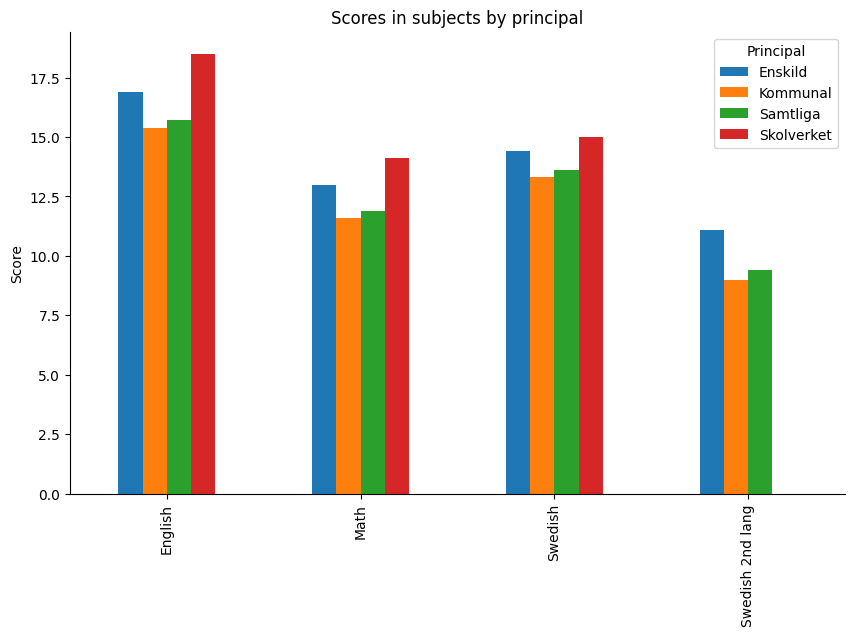

In [142]:

df_pivot = df_all_scores.pivot(index='Subject', columns='Huvudman', values='Score')
ax = df_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))

# Adding labels and title
plt.xlabel('')
plt.ylabel('Score')
plt.title('Scores in subjects by principal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title='Principal')
plt.show()

### d/e) Barcharts in subplot for the different subjects

Text(0.5, 0, "['Samtliga', 'Kommunal', 'Enskild', 'Skolverket']")

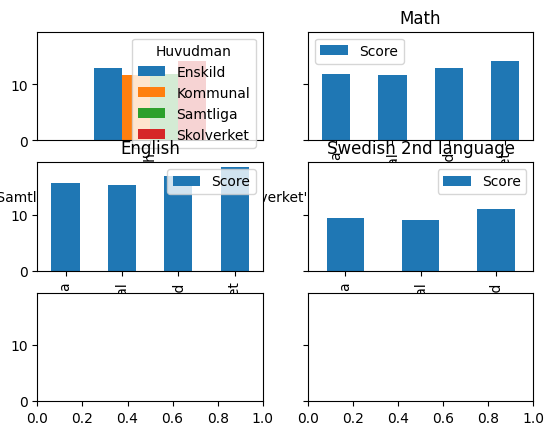

In [171]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey='all', squeeze=False)
#df_swed.plot(ax=axes[0,0], kind'bar', title='Swedish',x='Huvudman', y='Score')

df_pivot_math = df_math.pivot(index='Subject', columns='Huvudman', values='Score')
df_pivot_math.plot(ax=axes[0,0],kind='bar', stacked=False)

df_math.plot(ax=axes[0,1], kind='bar', title='Math', x='Huvudman', y='Score', )
df_eng.plot(ax=axes[1,0], kind='bar', title='English', x='Huvudman', y='Score')
df_sv2sp.plot(ax=axes[1,1], kind='bar', title='Swedish 2nd language', x='Huvudman', y='Score')
axes[0,0].set_xlabel(legends)


In [165]:
leg=list(df_swed['Huvudman'])
leg

['Samtliga', 'Kommunal', 'Enskild', 'Skolverket']